In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt
pd.set_option("display.width",120)
pd.set_option("display.max_columns",10)

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
df = yf.download(["HDFCBANK.NS", "ICICIBANK.NS"], period="1y", interval="1d", auto_adjust=False)["Adj Close"]
df = df.dropna()

[*********************100%***********************]  2 of 2 completed


In [42]:
df

Ticker,HDFCBANK.NS,ICICIBANK.NS
Date,,
2024-10-03,829.783813,1246.730103
2024-10-04,817.771240,1230.257202
2024-10-07,798.111938,1224.452026
2024-10-08,814.515198,1227.131348
2024-10-09,805.684631,1234.623535
...,...,...
2025-09-29,950.299988,1348.099976
2025-09-30,951.000000,1348.000000
2025-10-01,965.250000,1372.000000


In [44]:
pd.set_option("display.max_rows", None)
df

Ticker,HDFCBANK.NS,ICICIBANK.NS
Date,,
2024-10-03,829.783813,1246.730103
2024-10-04,817.771240,1230.257202
2024-10-07,798.111938,1224.452026
2024-10-08,814.515198,1227.131348
2024-10-09,805.684631,1234.623535
2024-10-10,820.114502,1233.978516
2024-10-11,814.490601,1213.635498
2024-10-14,832.793152,1222.318481
2024-10-15,830.819824,1245.886597


In [45]:
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/hdfc_icici_prices.csv", index=True, date_format="%Y-%m-%d")
print("Saved:", "data/hdfc_icici_prices.csv")

Saved: data/hdfc_icici_prices.csv


In [31]:
hdfcbank,icicibank=df["HDFCBANK.NS"],df["ICICIBANK.NS"]
df.tail()

Ticker,HDFCBANK.NS,ICICIBANK.NS
Date,,
2025-09-29,950.299988,1348.099976
2025-09-30,951.000000,1348.000000
2025-10-01,965.250000,1372.000000
2025-10-02,965.250000,1372.000000
2025-10-03,965.150024,1365.199951


Regress KO ~ alpha +beta*PEP

In [32]:
X=sm.add_constant(icicibank)
ols=sm.OLS(hdfcbank,X).fit()
alpha=ols.params["const"]
beta=ols.params["ICICIBANK.NS"]
print(f"alpha={alpha:.4f}, beta={beta:.4f}")

alpha=-42.1462, beta=0.7125


In [33]:
spread=hdfcbank - beta*icicibank
roll=60
mu=spread.rolling(roll).mean()
sd=spread.rolling(roll).std()
z=((spread-mu)/sd).dropna()
vol = spread.rolling(60).std()
low, high = vol.quantile(0.1), vol.quantile(0.9)
vol_filter = (vol > low) & (vol < high)
z.tail()

Date
2025-09-29    1.987822
2025-09-30    1.975952
2025-10-01    1.680970
2025-10-02    1.698908
2025-10-03    2.125004
dtype: float64

In [34]:
adf_stat, pval, *_ = adfuller(spread.dropna(), maxlag=1)
print(f"ADF stat={adf_stat:.3f}, p-value={pval:.4f}  (want p<0.05)")

ADF stat=-4.376, p-value=0.0003  (want p<0.05)


In [35]:
entry_hi, entry_lo, exit_th = 1.5, -1.5, 0.5  # try lower entry, tighter exit
# or experiment with: 2.5, -2.5, 0.8

pos = pd.Series(0.0, index=z.index)
state = 0
for ts, val in z.items():
    # Skip if volatility is too low/high (outside 10–90% band)
    if not vol_filter.loc[ts]:
        pos.loc[ts] = 0
        continue

    if state == 0:
        if val > entry_hi:
            state = -1   # short spread
        elif val < entry_lo:
            state = +1   # long spread
    else:
        if abs(val) < exit_th:
            state = 0    # exit
    pos.loc[ts] = state
print("Position counts:", pos.value_counts())

Position counts:  0.0    121
 1.0     44
-1.0     28
Name: count, dtype: int64


In [36]:
spread_ret = spread.diff().reindex(pos.index).fillna(0.0)
strategy_ret_raw = pos.shift(1).fillna(0.0) * spread_ret
vol = spread.diff().rolling(roll).std().reindex(pos.index)
strategy_ret = (strategy_ret_raw / (vol + 1e-12)).fillna(0.0)
tc_bps = 0.0004
turnover = pos.diff().abs().fillna(0.0)
strategy_ret = strategy_ret - tc_bps * turnover
ann_factor = np.sqrt(252)
sharpe = (strategy_ret.mean() / (strategy_ret.std() + 1e-12)) * ann_factor
cum = strategy_ret.cumsum()
max_dd = (cum - cum.cummax()).min()
trades_opened = int((pos.diff().abs() == 1).sum())
print(f"Trades opened: {trades_opened}")
print(f"Sharpe (annualized, normalized): {sharpe:.2f}")
print(f"Max drawdown (normalized units): {max_dd:.2f}")

Trades opened: 20
Sharpe (annualized, normalized): 3.09
Max drawdown (normalized units): -2.84


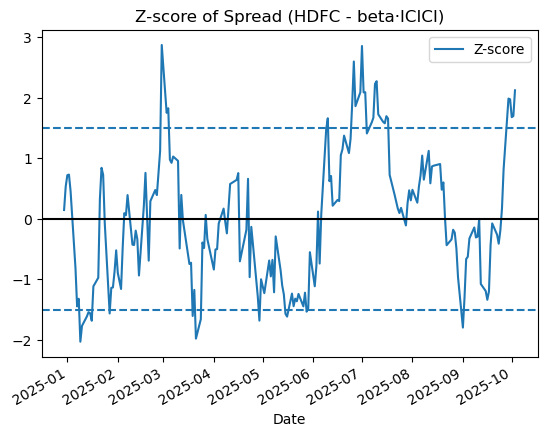

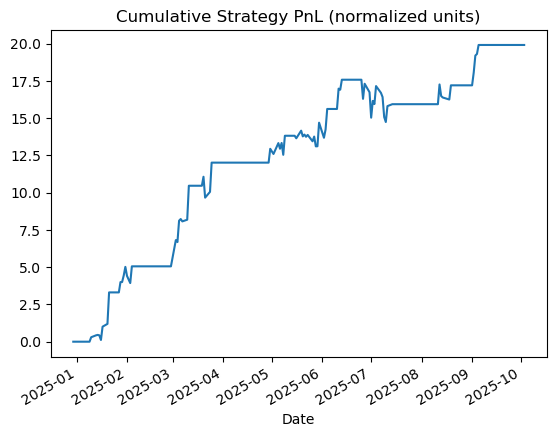

In [37]:
fig, ax = plt.subplots()
z.plot(ax=ax, label="Z-score")
ax.axhline(entry_hi, linestyle="--")
ax.axhline(entry_lo, linestyle="--")
ax.axhline(0.0, color="k")
ax.set_title("Z-score of Spread (HDFC - beta·ICICI)")
ax.legend()
plt.show()

# Cumulative normalized PnL
fig, ax = plt.subplots()
cum.plot(ax=ax)
ax.set_title("Cumulative Strategy PnL (normalized units)")
plt.show()

Long entries : 6
Short entries: 4

Final capital: ₹109,747.36
Total profit:  ₹9,747.36  (9.75%)


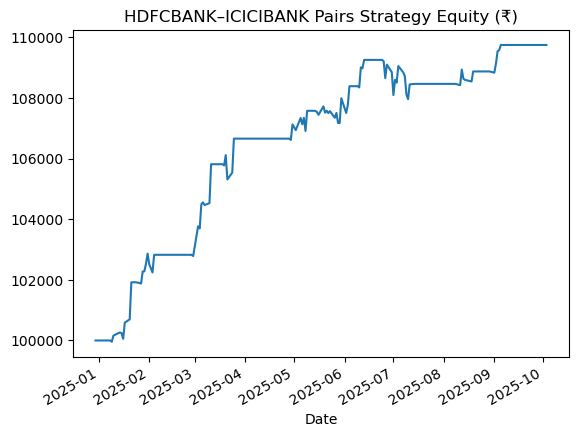

In [38]:
# ===== AFTER YOUR CURRENT CELL: trade counts + ₹100,000 capital PnL =====

initial_capital = 100000.0   # ₹100k starting capital
tc_bps = 0.0004              # 4 bps per entry/exit (very simple costs)

idx = pos.index

# --- entries/exits from position changes ---
chg = pos.diff().fillna(0)

long_entries     = (pos.eq(1)  & chg.eq(1))    # 0 -> +1
short_entries    = (pos.eq(-1) & chg.eq(-1))   # 0 -> -1
exit_from_long   = (pos.eq(0)  & chg.eq(-1))   # +1 -> 0
exit_from_short  = (pos.eq(0)  & chg.eq(1))    # -1 -> 0

n_long  = int(long_entries.sum())
n_short = int(short_entries.sum())
print(f"Long entries : {n_long}")
print(f"Short entries: {n_short}")

# --- daily price deltas aligned to pos index ---
dHDFCBANK  = hdfcbank.reindex(idx).diff().fillna(0.0)
dICICIBANK = icicibank.reindex(idx).diff().fillna(0.0)

# --- capital-based equity curve in ₹ ---
equity = pd.Series(initial_capital, index=idx, dtype=float)

in_position = 0          # +1 = long spread, -1 = short spread, 0 = flat
units = 0.0              # q (HDFC shares); ICICI shares = beta * q

for t in range(1, len(idx)):
    tstamp = idx[t]

    # entry logic
    if in_position == 0:
        if long_entries.iloc[t] or short_entries.iloc[t]:
            # position sizing: choose q so total notional ≈ initial_capital at entry
            denom = abs(hdfcbank.loc[tstamp]) + abs(beta) * abs(icicibank.loc[tstamp])
            units = initial_capital / max(denom, 1e-12)

            in_position = 1 if long_entries.iloc[t] else -1
            # apply tiny transaction cost on entry
            equity.iloc[t] = equity.iloc[t-1] - initial_capital * tc_bps
            continue

        # remain flat
        equity.iloc[t] = equity.iloc[t-1]
        continue

    # mark-to-market PnL while in a trade (self-financing hedge)
    # PnL_t = pos * q * (ΔHDFC - beta * ΔICICI)
    pnl_today = in_position * units * (dHDFCBANK.iloc[t] - beta * dICICIBANK.iloc[t])
    equity.iloc[t] = equity.iloc[t-1] + pnl_today

    # exit logic (+ cost)
    if (in_position == 1 and exit_from_long.iloc[t]) or (in_position == -1 and exit_from_short.iloc[t]):
        equity.iloc[t] -= initial_capital * tc_bps
        in_position = 0
        units = 0.0

# --- summary ---
final_capital = float(equity.iloc[-1])
profit = final_capital - initial_capital
ret_pct = 100.0 * profit / initial_capital
print(f"\nFinal capital: ₹{final_capital:,.2f}")
print(f"Total profit:  ₹{profit:,.2f}  ({ret_pct:.2f}%)")

# (optional) plot equity in ₹
equity.plot(title="HDFCBANK–ICICIBANK Pairs Strategy Equity (₹)")
plt.show()


Saved plots to plots/


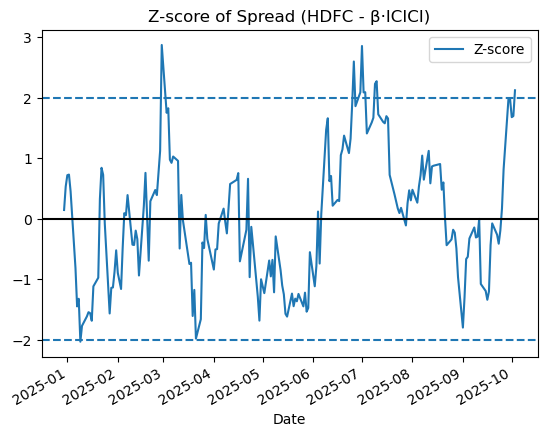

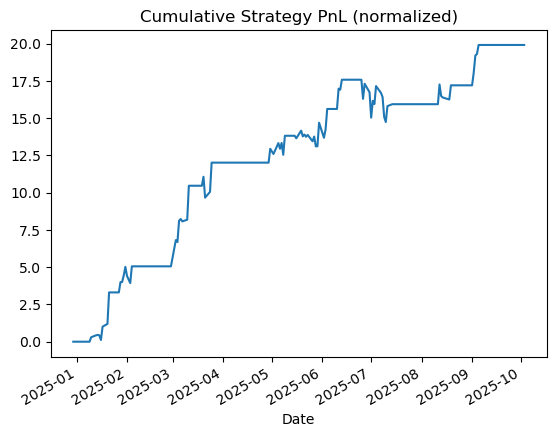

In [46]:
import matplotlib.pyplot as plt

# After you compute z
fig, ax = plt.subplots()
z.plot(ax=ax, label="Z-score")
ax.axhline(2.0, ls="--"); ax.axhline(-2.0, ls="--"); ax.axhline(0, color="k")
ax.set_title("Z-score of Spread (HDFC - β·ICICI)")
ax.legend()
os.makedirs("plots", exist_ok=True)
fig.savefig("plots/zscore_plot.png", dpi=150, bbox_inches="tight")

# After you compute cum (cumulative PnL)
fig2, ax2 = plt.subplots()
cum.plot(ax=ax2)
ax2.set_title("Cumulative Strategy PnL (normalized)")
fig2.savefig("plots/pnl_plot.png", dpi=150, bbox_inches="tight")
print("Saved plots to plots/")


In [47]:
# Build a simple trade log from pos
chg = pos.diff().fillna(0)
entries_long  = chg[(pos.eq(1)  & chg.eq(1))].index
entries_short = chg[(pos.eq(-1) & chg.eq(-1))].index
exits         = chg[(pos.eq(0)  & chg.abs().eq(1))].index

# Pair each entry with the next exit
trades = []
open_dir = None
open_time = None
for ts in chg.index:
    if ts in entries_long or ts in entries_short:
        open_dir = "LONG_SPREAD" if ts in entries_long else "SHORT_SPREAD"
        open_time = ts
    if open_dir and ts in exits:
        close_time = ts
        pnl = (spread.loc[close_time] - spread.loc[open_time])
        pnl = pnl if open_dir == "LONG_SPREAD" else -pnl
        trades.append([open_time, close_time, open_dir, float(pnl)])
        open_dir = None
        open_time = None

trade_log = pd.DataFrame(trades, columns=["entry_time","exit_time","direction","pnl_spread_units"])
os.makedirs("data", exist_ok=True)
trade_log.to_csv("data/trade_log.csv", index=False)
print("Saved:", "data/trade_log.csv")


Saved: data/trade_log.csv
